In [1]:
import tushare as ts

import pandas as pd
import numpy as np
import statsmodels.api as sm #统计运算
import scipy.stats as scs #科学计算
import matplotlib.pyplot as plt #绘图

%matplotlib inline

In [2]:
_stock_set = ['000413.XSHE','000063.XSHE','002007.XSHE','000001.XSHE','000002.XSHE']

stock_set = [stock.replace(".XSHE","") for stock in _stock_set]

noa = len(stock_set)

df_list = [ts.get_hist_data(stock, start = '2015-01-01', end ='2015-12-31')for stock in stock_set]


In [3]:
import pandas as pd

rd = {}

for index,stock_name in enumerate(_stock_set):
    df = df_list[index]
    rd[stock_name] = df['close']

df2 = pd.DataFrame(rd)

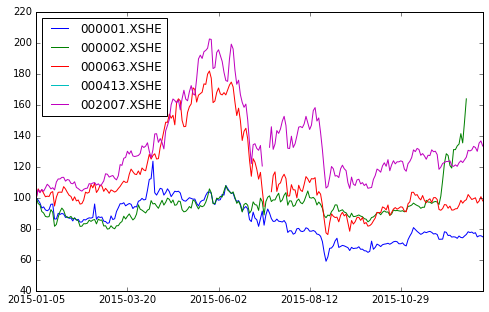

In [4]:
%matplotlib inline

(df2/df2.ix[0]*100).plot(figsize=(8,5))

In [5]:
data = df2 

returns = np.log(data / data.shift(1))
returns.mean() * 252

000001.XSHE   -0.298044
000002.XSHE    0.527256
000063.XSHE   -0.120986
000413.XSHE   -0.134785
002007.XSHE    0.201374
dtype: float64

In [6]:
data.head()

,000001.XSHE,000002.XSHE,000063.XSHE,000413.XSHE,002007.XSHE
2015-01-05,16.02,14.91,19.01,NaN,32.99
2015-01-06,15.78,14.36,20.11,NaN,34.70
2015-01-07,15.48,14.23,19.71,NaN,34.07
2015-01-08,14.96,13.59,19.99,NaN,34.77
2015-01-09,15.08,13.45,19.55,NaN,34.38


In [7]:
data.shift(1).head()

,000001.XSHE,000002.XSHE,000063.XSHE,000413.XSHE,002007.XSHE
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,16.02,14.91,19.01,NaN,32.99
2015-01-07,15.78,14.36,20.11,NaN,34.70
2015-01-08,15.48,14.23,19.71,NaN,34.07
2015-01-09,14.96,13.59,19.99,NaN,34.77


In [8]:
np.log( data.head() / data.shift(1).head() )

,000001.XSHE,000002.XSHE,000063.XSHE,000413.XSHE,002007.XSHE
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,-0.015095,-0.037586,0.056252,NaN,0.050535
2015-01-07,-0.019194,-0.009094,-0.020091,NaN,-0.018322
2015-01-08,-0.034169,-0.046018,0.014106,NaN,0.020338
2015-01-09,0.007989,-0.010355,-0.022257,NaN,-0.011280


In [9]:
returns.cov() * 252

,000001.XSHE,000002.XSHE,000063.XSHE,000413.XSHE,002007.XSHE
000001.XSHE,0.272857,0.146903,0.157914,0.104361,0.082566
000002.XSHE,0.146903,0.241608,0.150611,0.097540,0.076049
000063.XSHE,0.157914,0.150611,0.376563,0.208593,0.193049
000413.XSHE,0.104361,0.097540,0.208593,0.433360,0.200617
002007.XSHE,0.082566,0.076049,0.193049,0.200617,0.320925


In [29]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.24935035,  0.41826544,  0.14308627,  0.02370598,  0.16559196])

In [30]:
np.sum(returns.mean()*weights)*252

0.15905498383650002

In [32]:
np.dot(weights, np.dot(returns.cov() * 252, weights))

0.16858409674534192

In [33]:
np.sqrt(np.dot(weights, np.dot(returns.cov() * 252, weights)))

0.41058993746235661

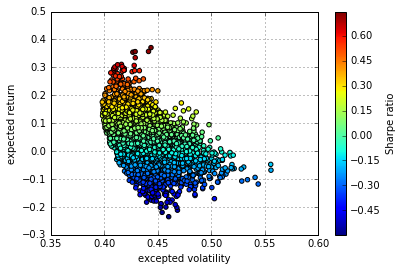

In [35]:
means = returns.mean() * 252
cov   = returns.cov()   * 252

def E_sigma_weight(weight):
    E = np.dot(means,weight)
    sigma = np.sqrt(np.dot(np.dot(weight,cov), weight))
    return E,sigma

iters = 4000

E_list     = []
sigma_list = []
for i in range(iters):
    weight = np.random.random(noa)
    weight /= weight.sum()
    E,sigma = E_sigma_weight(weight)
    E_list.append(E)
    sigma_list.append(sigma)
E_array = np.array(E_list)
sigma_array = np.array(sigma_list)

risk_free = 0.04

plt.scatter(sigma_array, E_array, c = (E_array - risk_free)/sigma_array, marker = 'o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = "Sharpe ratio")

剩下的求最小方差组合，求最优夏普比率，求有效边界基本用的是和我一模一样的方法，懒得再实现一遍了。他这个有趣的就是利用真实数据，计算年化收益的方法和上面这个带颜色的散点图。